In [1]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
baseline = ["maximumClearanceRatio","boundaryShear","clusterDiffusion"]
minSlip = ["proposed0","proposed1","proposed8"]
smash = ["proposed6"]
final = ["proposed9","bruteForce"]

In [3]:
summary = {}

In [4]:
overall = {}

for folder in os.listdir("new_proposed/3/0/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/3/0/"+folder):
#         try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/3/0/"+folder+"/"+filename, 'r') as f:
            dic = json.load(f)
        overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
#         except:
#             continue

In [5]:
optimal = {}
for filename in os.listdir("new_proposed/3/0/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/3/0/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [6]:
actual = np.mean(overall["proposed9"])/0.95
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        summary[key] = {}
        summary[key]["ratio"] = [np.mean(overall[key])/actual]
        summary[key]["scalar"] = [np.mean(overall[key])/3]
print(actual/3)

proposed1 0.888410453752247 0.6214579152812871
proposed6 0.7712456036333217 0.5394991503977559
proposed8 0.9472197287498776 0.6625959830346225
proposed9 0.95 0.6645408290995467
maximumClearanceRatio 0.587799536340074 0.41117556970922303
proposed0 0.9223691929253782 0.6452126191605375
clusterDiffusion 0.9594070662201378 0.6711212286630465
boundaryShear 0.7707156584247484 0.5391284448943005
proposed4 0.7541702826636069 0.5275546788668556
distribution_stable 0.6616182728425924 0.46281300587602786
0.6995166622100492


Text(0.5,1,'3-body group 0 (disk) objects single point pushing')

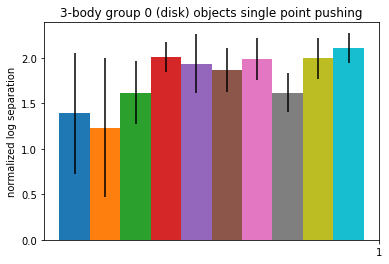

In [7]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]

width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
# ax.set_xticklabels(("3-body disk objects"))
ax.set_title('3-body group 0 (disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:
overall = {}

for folder in os.listdir("new_proposed/3/1/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/3/1/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/3/1/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [9]:
optimal = {}
for filename in os.listdir("new_proposed/3/1/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/3/1/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [10]:
actual = np.mean(overall["proposed9"])/0.942
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/3)
print(actual/3)
summary

proposed1 0.8313242008978482 0.5968810841839709
proposed6 0.7145879325508324 0.5130658044900749
proposed8 0.9385706238875904 0.673882765549477
proposed9 0.9419999999999998 0.6763450176165272
maximumClearanceRatio 0.5967928799958666 0.4284903300787924
proposed0 0.863390053736131 0.6199039926795095
clusterDiffusion 0.9353675185162699 0.6715829732365329
boundaryShear 0.7432948716381883 0.5336770520726166
proposed4 0.7056530468092764 0.5066506606957285
distribution_stable 0.6431043413588171 0.4617414194114589
0.7179883414188187


{'proposed1': {'ratio': [0.888410453752247, 0.8313242008978482],
  'scalar': [0.6214579152812871, 0.5968810841839709]},
 'proposed6': {'ratio': [0.7712456036333217, 0.7145879325508324],
  'scalar': [0.5394991503977559, 0.5130658044900749]},
 'proposed8': {'ratio': [0.9472197287498776, 0.9385706238875904],
  'scalar': [0.6625959830346225, 0.673882765549477]},
 'proposed9': {'ratio': [0.95, 0.9419999999999998],
  'scalar': [0.6645408290995467, 0.6763450176165272]},
 'maximumClearanceRatio': {'ratio': [0.587799536340074, 0.5967928799958666],
  'scalar': [0.41117556970922303, 0.4284903300787924]},
 'proposed0': {'ratio': [0.9223691929253782, 0.863390053736131],
  'scalar': [0.6452126191605375, 0.6199039926795095]},
 'clusterDiffusion': {'ratio': [0.9594070662201378, 0.9353675185162699],
  'scalar': [0.6711212286630465, 0.6715829732365329]},
 'boundaryShear': {'ratio': [0.7707156584247484, 0.7432948716381883],
  'scalar': [0.5391284448943005, 0.5336770520726166]},
 'proposed4': {'ratio': [0

Text(0.5,1,'3-body group 1 (semi-disk) objects single point pushing')

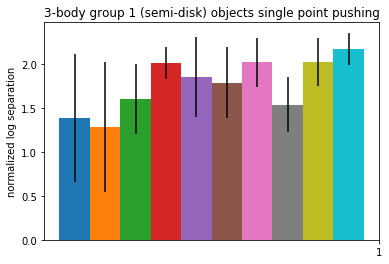

In [11]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]

width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
# ax.set_xticklabels(("3-body disk objects"))
ax.set_title('3-body group 1 (semi-disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
overall = {}

for folder in os.listdir("new_proposed/3/2/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/3/2/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/3/2/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [13]:
optimal = {}
for filename in os.listdir("new_proposed/3/2/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/3/2/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [14]:
actual = np.mean(overall["proposed9"])/0.856
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/3)
print(actual/3)
summary

proposed1 0.7669727817279852 0.5751391624782082
proposed6 0.6193945836966323 0.46447291298684307
proposed8 0.8558092145495688 0.6417560135422632
proposed9 0.8560000000000001 0.6418990801370476
maximumClearanceRatio 0.5706139506537699 0.4278931892967541
proposed0 0.7777696550426125 0.5832355445448151
clusterDiffusion 0.8775457521467279 0.6580558540667735
boundaryShear 0.7003638848205492 0.5251903427891584
proposed4 0.598908891419359 0.4491110589812913
distribution_stable 0.5826350014180897 0.43690756012373727
0.7498821029638405


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852],
  'scalar': [0.6214579152812871, 0.5968810841839709, 0.5751391624782082]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323],
  'scalar': [0.5394991503977559, 0.5130658044900749, 0.46447291298684307]},
 'proposed8': {'ratio': [0.9472197287498776,
   0.9385706238875904,
   0.8558092145495688],
  'scalar': [0.6625959830346225, 0.673882765549477, 0.6417560135422632]},
 'proposed9': {'ratio': [0.95, 0.9419999999999998, 0.8560000000000001],
  'scalar': [0.6645408290995467, 0.6763450176165272, 0.6418990801370476]},
 'maximumClearanceRatio': {'ratio': [0.587799536340074,
   0.5967928799958666,
   0.5706139506537699],
  'scalar': [0.41117556970922303, 0.4284903300787924, 0.4278931892967541]},
 'proposed0': {'ratio': [0.9223691929253782,
   0.863390053736131,
   0.7777696550426125],
  'scalar': [0.6452126191605375, 0.6199039926795095, 0.5832355445448151]},
 'cluste

Text(0.5,1,'3-body group 2 (semi-slice) objects single point pushing')

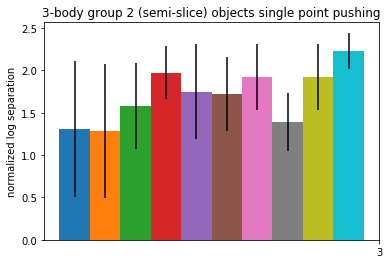

In [15]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("3-body disk objects"))
ax.set_title('3-body group 2 (semi-slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [16]:
overall = {}

for folder in os.listdir("new_proposed/3/3/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/3/3/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/3/3/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [17]:
optimal = {}
for filename in os.listdir("new_proposed/3/3/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/3/3/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [18]:
actual = np.mean(overall["proposed9"])/0.765
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/3)
print(actual/3)
summary

proposed1 0.6769823421489429 0.5198854602141402
proposed6 0.5409909588268162 0.4154515060298128
proposed8 0.7649999999999999 0.5874782136877604
proposed9 0.7649999999999999 0.5874782136877604
maximumClearanceRatio 0.4943800423541837 0.3796568681896931
proposed0 0.7325363298404702 0.5625478882562975
clusterDiffusion 0.7873412093980441 0.6046350421698352
boundaryShear 0.6189139631684413 0.4752921170047167
proposed4 0.4984967485607323 0.3828182736910009
distribution_stable 0.49704433738562454 0.3817029012430369
0.7679453773696215


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128]},
 'proposed8': {'ratio': [0.9472197287498776,
   0.9385706238875904,
   0.8558092145495688,
   0.7649999999999999],
  'scalar': [0.6625959830346225,
   0.673882765549477,
   0.6417560135422632,
   0.5874782136877604]},
 'proposed9': {'ratio': [0.95,
   0.9419999999999998,
   0.8560000000000001,
   0.7649999999999999],
  'scalar': [0.6645408290995467,
   0.6763450176165272,
   0.6418990801370476,
   0.5874782136877604]},
 'maximumClearanceRatio': {'ratio': [0.587799536340074,
   0.5967928799958666,
   0.5706139506537699,
   0.4943800423541837],
  'scalar': [

Text(0.5,1,'3-body group 3 (slice) objects single point pushing')

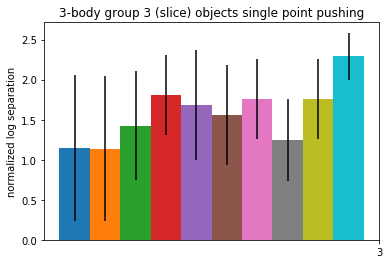

In [19]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("3-body disk objects"))
ax.set_title('3-body group 3 (slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
overall = {}

for folder in os.listdir("new_proposed/4/0/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/4/0/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/4/0/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [21]:
optimal = {}
for filename in os.listdir("new_proposed/4/0/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/4/0/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [22]:
actual = np.mean(overall["proposed9"])/0.915
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/6)
print(actual/6)
summary

proposed1 0.8115172886802636 0.8636933439227977
proposed6 0.9228696642023482 0.982205058842415
proposed8 0.8189664744035108 0.8716214709221329
proposed9 0.9150000000000001 0.973829418932723
maximumClearanceRatio 0.5444200081648474 0.5794231914825373
proposed0 0.7587671155173249 0.8075516275513603
clusterDiffusion 0.8158231191434336 0.8682760153741329
boundaryShear 0.6812731121124718 0.7250751900578974
proposed4 0.8267516970275313 0.8799072401289217
distribution_stable 0.6025278978592599 0.641267095806599
0.5321472234605044


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128,
   0.4911025294212075]},
 'proposed8': {'ratio': [0.9472197287498776,
   0.9385706238875904,
   0.8558092145495688,
   0.7649999999999999,
   0.8189664744035108],
  'scalar': [0.6625959830346225,
   0.673882765549477,
   0.6417560135422632,
   0.5874782136877604,
   0.43581073546106647]},
 'proposed9': {'ratio': [0.95,
   0.9419999999999998,
   0.8560000000000001,
   0.7649999999999999,
   0.9150000000000001],
  'scalar': [0.6645408290995467,
   0.6763450176165272,
   0.6418990801370476,
 

Text(0.5,1,'4-body group 0 (disk) objects single point pushing')

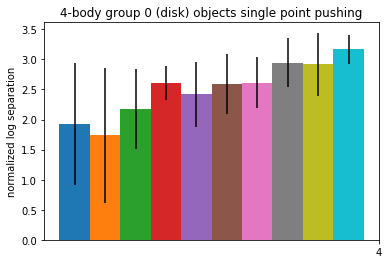

In [23]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1


ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('4-body group 0 (disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [24]:
overall = {}

for folder in os.listdir("new_proposed/4/1/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/4/1/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/4/1/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [25]:
optimal = {}
for filename in os.listdir("new_proposed/4/1/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/4/1/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [26]:
actual = np.mean(overall["proposed9"])/0.9
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/6)
print(actual/6)
summary

proposed1 0.8245204905864686 0.8809512515442576
proposed6 0.9238782798004938 0.9871091575733821
proposed8 0.7893620924746821 0.8433865879943693
proposed9 0.9 0.9615966315474896
maximumClearanceRatio 0.5803946129689547 0.6201172275547286
proposed0 0.7811722780269688 0.8346362568989024
clusterDiffusion 0.8151568705022104 0.8709467787307986
boundaryShear 0.6670582419706171 0.7127121761388174
proposed4 0.7770535787828248 0.830235670988318
distribution_stable 0.5851088027474002 0.6251540597896496
0.5342203508597164


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128,
   0.4911025294212075,
   0.49355457878669107]},
 'proposed8': {'ratio': [0.9472197287498776,
   0.9385706238875904,
   0.8558092145495688,
   0.7649999999999999,
   0.8189664744035108,
   0.7893620924746821],
  'scalar': [0.6625959830346225,
   0.673882765549477,
   0.6417560135422632,
   0.5874782136877604,
   0.43581073546106647,
   0.42169329399718464]},
 'proposed9': {'ratio': [0.95,
   0.9419999999999998,
   0.85600

Text(0.5,1,'4-body group 1 (semi-disk) objects single point pushing')

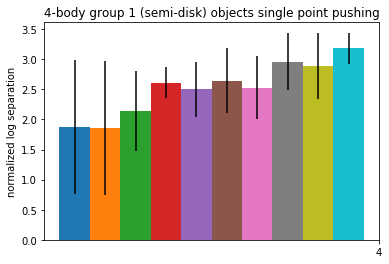

In [27]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('4-body group 1 (semi-disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [28]:
overall = {}

for folder in os.listdir("new_proposed/4/2/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/4/2/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/4/2/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [29]:
optimal = {}
for filename in os.listdir("new_proposed/4/2/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/4/2/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [30]:
actual = np.mean(overall["proposed9"])/0.895
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/6)
print(actual/6)
summary

proposed1 0.8082581619198331 0.8610356541405636
proposed6 0.8492009752716388 0.9046519437589585
proposed8 0.8233879306970254 0.8771533637658173
proposed9 0.895 0.9534415447477272
maximumClearanceRatio 0.522749834531025 0.5568842567060104
proposed0 0.7646257008005726 0.8145540886314094
clusterDiffusion 0.8259924966040488 0.879928002136532
boundaryShear 0.6684691298722162 0.7121187036888658
proposed4 0.7822759930886933 0.8333569064464204
distribution_stable 0.5788068328663887 0.6166016545683456
0.5326489076802946


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128,
   0.4911025294212075,
   0.49355457878669107,
   0.45232597187947926]},
 'proposed8': {'ratio': [0.9472197287498776,
   0.9385706238875904,
   0.8558092145495688,
   0.7649999999999999,
   0.8189664744035108,
   0.7893620924746821,
   0.8233879306970254],
  'scalar': [0.6625959830346225,
   0.673882765549477,
   0.6417560135422632,
   0.5874782136877604

Text(0.5,1,'4-body group 2 (semi-slice) objects single point pushing')

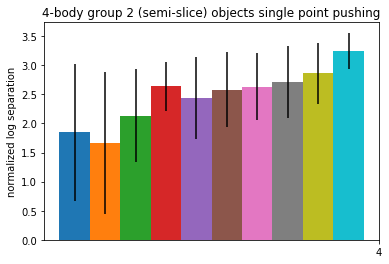

In [31]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('4-body group 2 (semi-slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [32]:
overall = {}

for folder in os.listdir("new_proposed/4/3/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/4/3/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/4/3/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [33]:
optimal = {}
for filename in os.listdir("new_proposed/4/3/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/4/3/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [34]:
actual = np.mean(overall["proposed9"])/0.799
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/6)
print(actual/6)
summary

proposed1 0.6207868156816149 0.6801448631934403
proposed6 0.7440036839692397 0.8151434132715275
proposed8 0.6990936542568797 0.7659392013856999
proposed9 0.799 0.8753983363755468
maximumClearanceRatio 0.4629984847873209 0.5072692156786228
proposed0 0.5829820966374419 0.6387253536084416
clusterDiffusion 0.7695949858431937 0.8431816899750867
boundaryShear 0.5925149274945778 0.6491696893697511
proposed4 0.585600312356967 0.6415939164183847
distribution_stable 0.5005917546368815 0.5484570578378498
0.5478087211361369


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128,
   0.4911025294212075,
   0.49355457878669107,
   0.45232597187947926,
   0.40757170663576375]},
 'proposed8': {'ratio': [0.9472197287498776,
   0.9385706238875904,
   0.8558092145495688,
   0.7649999999999999,
   0.8189664744035108,
   0.7893620924746821,
   0.8233879306970254,
   0.69

Text(0.5,1,'4-body group 3 (slice) objects single point pushing')

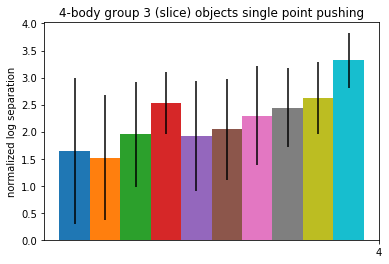

In [35]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('4-body group 3 (slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [36]:
overall = {}

for folder in os.listdir("new_proposed/5/0/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/5/0/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/5/0/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [37]:
optimal = {}
for filename in os.listdir("new_proposed/5/0/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/5/0/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [38]:
actual = np.mean(overall["proposed9"])/0.889
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/10)
print(actual/10)
summary

proposed1 0.7511336459580623 1.118556113309179
proposed6 0.7742111168699163 1.1529220963896525
proposed8 0.7460000183893382 1.110911334605218
proposed9 0.889 1.3238607937253553
maximumClearanceRatio 0.4653931331470358 0.6930435575279693
proposed0 0.6889351663126253 1.0259327965128702
clusterDiffusion 0.7303139854760774 1.087552364995599
boundaryShear 0.5853063055643779 0.8716131273981019
proposed4 0.8395363295715792 1.2502016103800926
distribution_stable 0.5212468340887179 0.7762185011288172
0.44674717448549667


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397,
   0.7742111168699163],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128,
   0.4911025294212075,
   0.49355457878669107,
   0.45232597187947926,
   0.40757170663576375,
   0.34587662891689575]},
 'proposed8': {'ratio': [0.9472197287498776,
   0.9385706238875904,
   0.8558092145495688,
   0.7

Text(0.5,1,'5-body group 0 (disk) objects single point pushing')

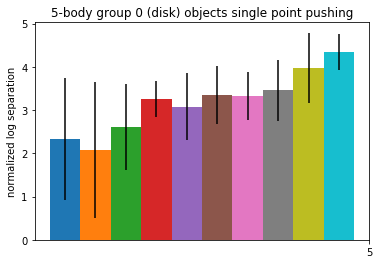

In [39]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("5-body disk objects"))
ax.set_title('5-body group 0 (disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [40]:
overall = {}

for folder in os.listdir("new_proposed/5/1/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/5/1/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/5/1/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [41]:
optimal = {}
for filename in os.listdir("new_proposed/5/1/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/5/1/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [42]:
actual = np.mean(overall["proposed9"])/0.853
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/10)
print(actual/10)
summary

proposed1 0.7744447573885067 1.1338197532251397
proposed6 0.7554521008220186 1.1060137038254116
proposed8 0.7492328252392187 1.0969084223456742
proposed9 0.853 1.248827938047318
maximumClearanceRatio 0.5041033200867736 0.73802849916386
proposed0 0.6983168094127256 1.0223652300148605
clusterDiffusion 0.7357503538904125 1.0771695162562114
boundaryShear 0.646880773912926 0.9470607069731919
proposed4 0.7724933891854119 1.1309628679620192
distribution_stable 0.5411455993382948 0.7922599566295694
0.4392126394070286


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397,
   0.7742111168699163,
   0.7554521008220186],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128,
   0.4911025294212075,
   0.49355457878669107,
   0.45232597187947926,
   0.40757170663576375,
   0.34587662891689575,
   0.3318041111476235]},
 'pr

Text(0.5,1,'5-body group 1 (semi-disk) objects single point pushing')

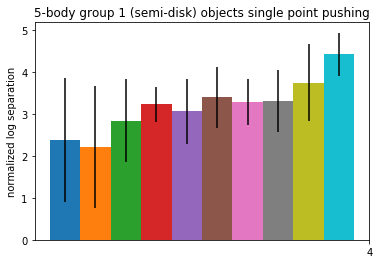

In [43]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('5-body group 1 (semi-disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [44]:
overall = {}

for folder in os.listdir("new_proposed/5/2/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/5/2/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/5/2/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [45]:
optimal = {}
for filename in os.listdir("new_proposed/5/2/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/5/2/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [46]:
actual = np.mean(overall["proposed9"])/0.801
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/10)
print(actual/10)
summary

proposed1 0.74714959261495 1.1071623568890865
proposed6 0.6885652950244388 1.0203493148448686
proposed8 0.7471576456283596 1.1071742902333523
proposed9 0.801 1.1869604917595098
maximumClearanceRatio 0.48205958545708966 0.7143391792903028
proposed0 0.6857973343542999 1.0162476170194017
clusterDiffusion 0.7213561597077758 1.0689404020730249
boundaryShear 0.6293774253867289 0.9326418705859748
proposed4 0.7348549686295452 1.088943589184075
distribution_stable 0.49003897876502717 0.7261634297331643
0.4445544912956965


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397,
   0.7742111168699163,
   0.7554521008220186,
   0.6885652950244388],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128,
   0.4911025294212075,
   0.49355457878669107,
   0.45232597187947926,
   0.4075

Text(0.5,1,'5-body group 2 (semi-slice) objects single point pushing')

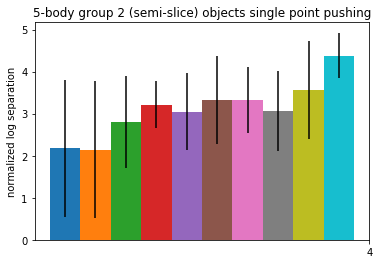

In [47]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('5-body group 2 (semi-slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [48]:
overall = {}

for folder in os.listdir("new_proposed/5/3/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/5/3/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/5/3/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [49]:
optimal = {}
for filename in os.listdir("new_proposed/5/3/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/5/3/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [50]:
actual = np.mean(overall["proposed9"])/0.770
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/10)
print(actual/10)
summary

proposed1 0.6845752703618723 1.0066822016101966
proposed6 0.6104908606827593 0.8977395332585661
proposed8 0.6492585919699356 0.9547482900355635
proposed9 0.7699999999999999 1.132301046793734
maximumClearanceRatio 0.4304564121028789 0.6329951247054088
proposed0 0.6255542336508054 0.9198905371286482
clusterDiffusion 0.6863749677962453 1.009328694193122
boundaryShear 0.5075827053126136 0.7464109461816465
proposed4 0.6667675004089186 0.9804955047805973
distribution_stable 0.4518135077686631 0.6644011789636443
0.4411562519975587


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397,
   0.7742111168699163,
   0.7554521008220186,
   0.6885652950244388,
   0.6104908606827593],
  'scalar': [0.5394991503977559,
   0.5130658044900749,
   0.46447291298684307,
   0.4154515060298128,
   0.49110

Text(0.5,1,'5-body group 3 (slice) objects single point pushing')

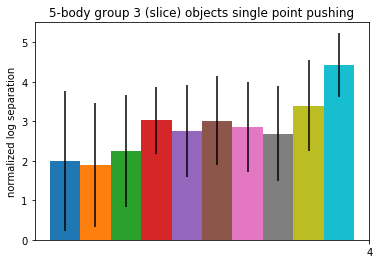

In [51]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('5-body group 3 (slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [52]:
overall = {}

for folder in os.listdir("new_proposed/6/0/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/6/0/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/6/0/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [53]:
optimal = {}
for filename in os.listdir("new_proposed/6/0/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/6/0/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [54]:
actual = np.mean(overall["proposed9"])/0.870
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/15)
print(actual/15)
summary

proposed1 0.7298695354919142 1.3730450981579765
proposed6 0.7948737770900816 1.4953323713563098
proposed8 0.6838550731125392 1.2864817756159639
proposed9 0.87 1.6366613172754807
maximumClearanceRatio 0.5020271424478877 0.944423453180236
proposed0 0.6605622921114651 1.2426629323559324
clusterDiffusion 0.6706086439922662 1.261562329485869
boundaryShear 0.5594413945049648 1.0524322869757787
proposed4 0.7893963771681606 1.485028177596016
distribution_stable 0.5066925980786348 0.953200201178292
0.3762439809828691


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723,
   0.7298695354919142],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896,
   0.2746090196315953]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397,
   0.7742111168699163,
   0.7554521008220186,
   0.6885652950244388,
   0.6104908606827593,
   0.7948737770900816],
  'scalar': [0.5394991503977559,
   0.513065

Text(0.5,1,'6-body group 0 (disk) objects single point pushing')

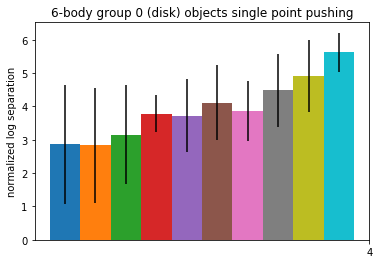

In [55]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('6-body group 0 (disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [56]:
overall = {}

for folder in os.listdir("new_proposed/6/1/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/6/1/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/6/1/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [57]:
optimal = {}
for filename in os.listdir("new_proposed/6/1/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/6/1/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [58]:
actual = np.mean(overall["proposed9"])/0.810
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/15)
print(actual/15)
summary

proposed1 0.7169286598911405 1.344749544194092
proposed6 0.7501818828591744 1.4071229140019585
proposed8 0.6936784212304115 1.3011388621407807
proposed9 0.81 1.519324295059717
maximumClearanceRatio 0.48086191213013807 0.901957019343444
proposed0 0.6496587932280359 1.2185708494451013
clusterDiffusion 0.6784806706408915 1.272632304485329
boundaryShear 0.5553521732967401 1.041679073091298
proposed4 0.7295757374428005 1.3684717814604392
distribution_stable 0.47988193034010385 0.900118858673919
0.3751418012493128


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723,
   0.7298695354919142,
   0.7169286598911405],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896,
   0.2746090196315953,
   0.2689499088388184]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397,
   0.7742111168699163,
   0.7554521008220186,
   0.6885652950244388,
   0.6104908606827593,
   0.7948737770900816,

Text(0.5,1,'6-body group 1 (semi-disk) objects single point pushing')

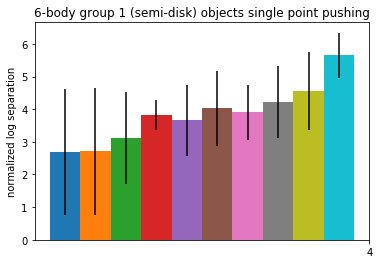

In [59]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('6-body group 1 (semi-disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [60]:
overall = {}

for folder in os.listdir("new_proposed/6/2/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/6/2/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/6/2/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [61]:
optimal = {}
for filename in os.listdir("new_proposed/6/2/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/6/2/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [62]:
actual = np.mean(overall["proposed9"])/0.822
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/15)
print(actual/15)
summary

proposed1 0.7123951857090123 1.349572115252572
proposed6 0.7229533074902901 1.3695735793714963
proposed8 0.6921061166517202 1.3111361987929404
proposed9 0.822 1.5572091179048797
maximumClearanceRatio 0.4473598025649179 0.8474851137934514
proposed0 0.6461641124929437 1.2241029776604944
clusterDiffusion 0.6834914775714976 1.2948164974265386
boundaryShear 0.5709096598727086 1.0815398149072453
proposed4 0.7070965957270411 1.3395343869898406
distribution_stable 0.46825864540812795 0.8870761948507601
0.3788829970571484


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723,
   0.7298695354919142,
   0.7169286598911405,
   0.7123951857090123],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896,
   0.2746090196315953,
   0.2689499088388184,
   0.2699144230505144]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397,
   0.7742111168699163,
   0.7554521008220186,
   0.6885652950244388,

Text(0.5,1,'6-body group 2 (semi-slice) objects single point pushing')

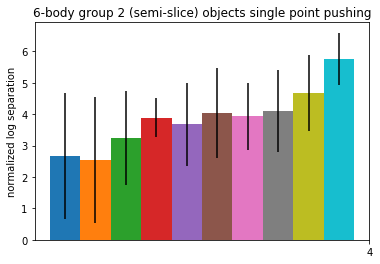

In [63]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('6-body group 2 (semi-slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [64]:
overall = {}

for folder in os.listdir("new_proposed/6/3/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/6/3/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/6/3/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [65]:
optimal = {}
for filename in os.listdir("new_proposed/6/3/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/6/3/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [66]:
actual = np.mean(overall["proposed9"])/0.767
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/15)
print(actual/15)
summary

proposed1 0.574167389834955 1.0932654694364878
proposed6 0.6102961866836311 1.1620578925977845
proposed8 0.6161339603577035 1.1731735297608135
proposed9 0.767 1.4604358065316525
maximumClearanceRatio 0.3103564087801928 0.5909460393339873
proposed0 0.5367465414441436 1.0220128659153234
clusterDiffusion 0.6523680738446642 1.2421664851119072
boundaryShear 0.4473937324102314 0.8518772182917114
proposed4 0.5504611571300199 1.0481267066199833
distribution_stable 0.3761811213820915 0.7162821113528505
0.3808176809730515


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723,
   0.7298695354919142,
   0.7169286598911405,
   0.7123951857090123,
   0.574167389834955],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896,
   0.2746090196315953,
   0.2689499088388184,
   0.2699144230505144,
   0.2186530938872976]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,
   0.7440036839692397,
   0.7742111168699163,


Text(0.5,1,'6-body group 3 (slice) objects single point pushing')

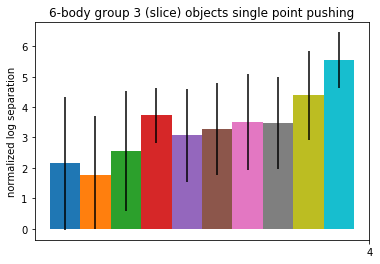

In [67]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[min(graph_info[p][1], graph_info[p][0]), graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('6-body group 3 (slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [68]:
overall = {}

for folder in os.listdir("new_proposed/7/0/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/7/0/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/7/0/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [69]:
optimal = {}
for filename in os.listdir("new_proposed/7/0/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/7/0/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [70]:
actual = np.mean(overall["proposed9"])/0.789
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/21)
print(actual/21)
summary

proposed1 0.6803906065476951 1.5846019777906735
proposed6 0.7364182051587208 1.7150879702713322
proposed8 0.6439547040396063 1.499744246626717
proposed9 0.789 1.8375488262846842
maximumClearanceRatio 0.4334317482605046 1.0094448672884777
proposed0 0.5670546875117226 1.3206472439498025
clusterDiffusion 0.6201977975777512 1.4444153802323736
boundaryShear 0.5139068663965344 1.1968681358258448
proposed4 0.7165404279599557 1.6687934377482152
distribution_stable 0.44904100127280755 1.045798181042518
0.3327084603086518


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723,
   0.7298695354919142,
   0.7169286598911405,
   0.7123951857090123,
   0.574167389834955,
   0.6803906065476951],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896,
   0.2746090196315953,
   0.2689499088388184,
   0.2699144230505144,
   0.2186530938872976,
   0.22637171111295334]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482,
   0.9238782798004938,
   0.8492009752716388,

Text(0.5,1,'7-body group 0 (disk) objects single point pushing')

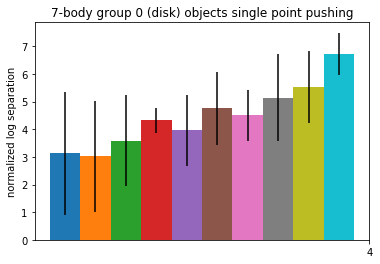

In [71]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('7-body group 0 (disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [72]:
overall = {}

for folder in os.listdir("new_proposed/7/1/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/7/1/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/7/1/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [73]:
optimal = {}
for filename in os.listdir("new_proposed/7/1/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/7/1/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [74]:
actual = np.mean(overall["proposed9"])/0.781
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/21)
print(actual/21)
summary

proposed1 0.6486418871687734 1.4919627635940522
proposed6 0.754240304502136 1.7348531930782158
proposed8 0.6705254249640865 1.5422978162204257
proposed9 0.781 1.796404058105131
maximumClearanceRatio 0.41373976017860364 0.9516565738595227
proposed0 0.5899386591138346 1.3569375176250855
clusterDiffusion 0.6181823768761668 1.4219018315869674
boundaryShear 0.464576240453303 1.0685872517919828
proposed4 0.7054909199835357 1.6227231134631828
distribution_stable 0.4427134154110182 1.01829984125728
0.3285904624300587


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723,
   0.7298695354919142,
   0.7169286598911405,
   0.7123951857090123,
   0.574167389834955,
   0.6803906065476951,
   0.6486418871687734],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896,
   0.2746090196315953,
   0.2689499088388184,
   0.2699144230505144,
   0.2186530938872976,
   0.22637171111295334,
   0.21313753765629317]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323,
   0.5409909588268162,
   0.9228696642023482

Text(0.5,1,'7-body group 1 (semi-disk) objects single point pushing')

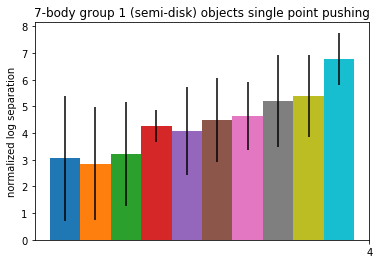

In [75]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('7-body group 1 (semi-disk) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [76]:
overall = {}

for folder in os.listdir("new_proposed/7/2/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/7/2/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/7/2/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [77]:
optimal = {}
for filename in os.listdir("new_proposed/7/2/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/7/2/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [78]:
actual = np.mean(overall["proposed9"])/0.805
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/3)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/21)
print(actual/21)
summary

proposed1 0.6728439213152899 1.5397231268751437
proposed6 0.7052755983630608 1.6139391547114108
proposed8 0.6687014464241136 1.530243566771553
proposed9 0.805 1.8421465630714684
maximumClearanceRatio 0.46745350610722786 1.069711639343028
proposed0 0.623765445100218 1.4274128830485855
clusterDiffusion 0.627327958975407 1.435565271484702
boundaryShear 0.5460534291056004 1.2495781958761136
proposed4 0.716114011717371 1.6387415719906535
distribution_stable 0.3984630084033848 0.9118351073806371
0.3269115462416093


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723,
   0.7298695354919142,
   0.7169286598911405,
   0.7123951857090123,
   0.574167389834955,
   0.6803906065476951,
   0.6486418871687734,
   0.6728439213152899],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896,
   0.2746090196315953,
   0.2689499088388184,
   0.2699144230505144,
   0.2186530938872976,
   0.22637171111295334,
   0.21313753765629317,
   0.2199604466964491]},
 'proposed6': {'ratio': [0.7712456036333217,
   0.7145879325508324,
   0.6193945836966323

Text(0.5,1,'7-body group 2 (semi-slice) objects single point pushing')

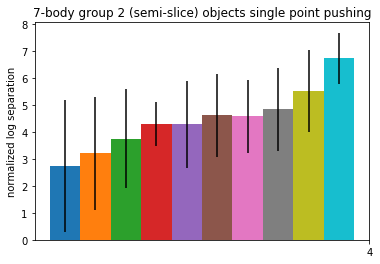

In [79]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[graph_info["distribution_stable"][1], graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
ax.set_title('7-body group 2 (semi-slice) objects single point pushing')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [80]:
overall = {}

for folder in os.listdir("new_proposed/7/3/"):
    overall[folder] = []
    for filename in os.listdir("new_proposed/7/3/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("new_proposed/7/3/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [81]:
optimal = {}
for filename in os.listdir("new_proposed/7/3/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("new_proposed/7/3/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["bruteForce"] = optimal_final

In [82]:
actual = np.mean(overall["proposed9"])/0.688
for key in overall.keys():
    if key != "bruteForce" and (len(key.split("_")) ==1 or key == "distribution_stable"):
        print(key, np.mean(overall[key])/actual, np.mean(overall[key])/21)
        
        summary[key]["ratio"].append(np.mean(overall[key])/actual)
        summary[key]["scalar"].append(np.mean(overall[key])/21)
print(actual/21)
summary

proposed1 0.5676851364981357 0.18961366249019904
proposed6 0.6258846219470782 0.20905299052878912
proposed8 0.5821184841781889 0.19443457418870058
proposed9 0.688 0.2298002737890696
maximumClearanceRatio 0.2799098678713287 0.09349326202484541
proposed0 0.5550653763154514 0.18539851082576117
clusterDiffusion 0.556833705912639 0.1859891541768993
boundaryShear 0.4447988878115038 0.14856817761650762
proposed4 0.5263720319372848 0.17581458874141995
distribution_stable 0.3331770162553389 0.11128513016817176
0.3340120258562059


{'proposed1': {'ratio': [0.888410453752247,
   0.8313242008978482,
   0.7669727817279852,
   0.6769823421489429,
   0.8115172886802636,
   0.8245204905864686,
   0.8082581619198331,
   0.6207868156816149,
   0.7511336459580623,
   0.7744447573885067,
   0.74714959261495,
   0.6845752703618723,
   0.7298695354919142,
   0.7169286598911405,
   0.7123951857090123,
   0.574167389834955,
   0.6803906065476951,
   0.6486418871687734,
   0.6728439213152899,
   0.5676851364981357],
  'scalar': [0.6214579152812871,
   0.5968810841839709,
   0.5751391624782082,
   0.5198854602141402,
   0.43184667196139886,
   0.4404756257721288,
   0.4305178270702818,
   0.3400724315967201,
   0.3355668339927537,
   0.34014592596754195,
   0.33214870706672595,
   0.30200466048305896,
   0.2746090196315953,
   0.2689499088388184,
   0.2699144230505144,
   0.2186530938872976,
   0.22637171111295334,
   0.21313753765629317,
   0.2199604466964491,
   0.18961366249019904]},
 'proposed6': {'ratio': [0.771245603633321

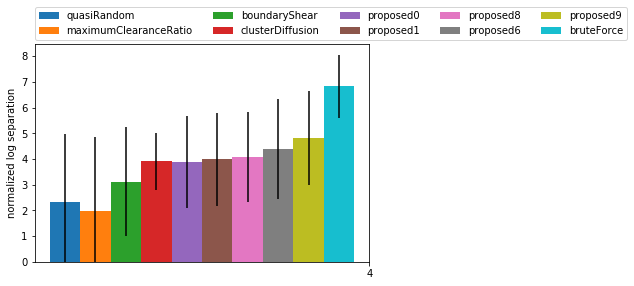

In [83]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [np.std(overall[p])], \
                          [np.std(overall[p])]]



width = 0.1
fig, ax = plt.subplots()
i = 0

rects = ax.bar(width*i, graph_info["distribution_stable"][0], width, yerr=[min(graph_info["distribution_stable"][1], graph_info["distribution_stable"][0]), graph_info["distribution_stable"][2]], label="quasiRandom")
i+=1


for p in baseline:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[min(graph_info[p][1], graph_info[p][0]), graph_info[p][2]], label=p)
    i+=1
    
for p in minSlip:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in smash:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

for p in final:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1

ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("4-body disk objects"))
# ax.set_title('7-body group 3 (slice) objects single point pushing')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, borderaxespad=0.)

In [85]:
for key in summary.keys():
    print(key, np.mean(summary[key]["ratio"]), np.mean(summary[key]["scalar"]))

proposed1 0.7244499062087756 0.3573676054716169
proposed6 0.7307507469722314 0.3524716685563093
proposed8 0.7390066215602179 0.36938451489194873
proposed9 0.8333499999999999 0.40834037448248567
maximumClearanceRatio 0.47886509744653105 0.2398006847779873
proposed0 0.6855585936787586 0.3433630616518147
clusterDiffusion 0.738375759531793 0.3712118976225342
boundaryShear 0.5957091691765021 0.2989182671392348
proposed4 0.6991804998785308 0.33611159996107376
distribution_stable 0.5055045448813632 0.253718582410572
